## **Exploratory Data Analysis**



##### **Importing Libraries**

In [204]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

##### **Importing Dataset**

In [205]:
df = pd.read_csv("House2.csv")
df.head()

,Date_Time,Usage_kW,AC_LR_kW,AC_DR_kW,AC_BR_kW,Kitchen_kW,UPS_kW
0,2018-06-01 00:00:00,0.8019,0.0,0.0,0.0,0.0,0.0
1,2018-06-01 00:01:00,0.8010,0.0,0.0,0.0,0.0,0.0
2,2018-06-01 00:02:00,0.7972,0.0,0.0,0.0,0.0,0.0
3,2018-06-01 00:03:00,0.8016,0.0,0.0,0.0,0.0,0.0
4,2018-06-01 00:04:00,0.8102,0.0,0.0,0.0,0.0,0.0


In [206]:
df.info() , df.shape , df.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Date_Time   525600 non-null  object 
 1   Usage_kW    525600 non-null  float64
 2   AC_LR_kW    525600 non-null  float64
 3   AC_DR_kW    525600 non-null  float64
 4   AC_BR_kW    525600 non-null  float64
 5   Kitchen_kW  525600 non-null  float64
 6   UPS_kW      525600 non-null  float64
dtypes: float64(6), object(1)
memory usage: 28.1+ MB


(None, (525600, 7), 0)

##### **Changing Date_Time Type : object - datetime64**

In [207]:
df.Date_Time = pd.to_datetime(df.Date_Time, infer_datetime_format=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   Date_Time   525600 non-null  datetime64[ns]
 1   Usage_kW    525600 non-null  float64       
 2   AC_LR_kW    525600 non-null  float64       
 3   AC_DR_kW    525600 non-null  float64       
 4   AC_BR_kW    525600 non-null  float64       
 5   Kitchen_kW  525600 non-null  float64       
 6   UPS_kW      525600 non-null  float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 28.1 MB


In [208]:
df.describe()

,Usage_kW,AC_LR_kW,AC_DR_kW,AC_BR_kW,Kitchen_kW,UPS_kW
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000
mean,0.411068,0.000284,0.001666,0.073979,0.013841,0.079055
std,0.386986,0.005841,0.043296,0.227362,0.077056,0.076869
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.142000,0.000000,0.000000,0.000000,0.000100,0.020000
50%,0.312600,0.000000,0.000000,0.000100,0.000200,0.043900
75%,0.565000,0.000100,0.000100,0.000200,0.000400,0.139700
max,4.515700,0.802200,1.289000,1.850100,2.069700,0.533000


##### **Checking for Nulls**

In [209]:
df.isnull().sum()

Date_Time     0
Usage_kW      0
AC_LR_kW      0
AC_DR_kW      0
AC_BR_kW      0
Kitchen_kW    0
UPS_kW        0
dtype: int64

##### **Extracting : Year , Month , Day , Hour from Date_Time**

In [210]:
df["Year"] , df["Month"] = df.Date_Time.dt.year , df.Date_Time.dt.month 
df["Day"] , df["Hour"] = df.Date_Time.dt.day , df.Date_Time.dt.hour
df.head()

,Date_Time,Usage_kW,AC_LR_kW,AC_DR_kW,AC_BR_kW,Kitchen_kW,UPS_kW,Year,Month,Day,Hour
0,2018-06-01 00:00:00,0.8019,0.0,0.0,0.0,0.0,0.0,2018,6,1,0
1,2018-06-01 00:01:00,0.8010,0.0,0.0,0.0,0.0,0.0,2018,6,1,0
2,2018-06-01 00:02:00,0.7972,0.0,0.0,0.0,0.0,0.0,2018,6,1,0
3,2018-06-01 00:03:00,0.8016,0.0,0.0,0.0,0.0,0.0,2018,6,1,0
4,2018-06-01 00:04:00,0.8102,0.0,0.0,0.0,0.0,0.0,2018,6,1,0


##### **Rearranging Columns**

In [211]:
df = df[['Date_Time', 'Year', 'Month', 'Day', 'Hour', 'Usage_kW', 'AC_LR_kW', 'AC_DR_kW', 'AC_BR_kW', 'Kitchen_kW', 'UPS_kW']]
df.head()

,Date_Time,Year,Month,Day,Hour,Usage_kW,AC_LR_kW,AC_DR_kW,AC_BR_kW,Kitchen_kW,UPS_kW
0,2018-06-01 00:00:00,2018,6,1,0,0.8019,0.0,0.0,0.0,0.0,0.0
1,2018-06-01 00:01:00,2018,6,1,0,0.8010,0.0,0.0,0.0,0.0,0.0
2,2018-06-01 00:02:00,2018,6,1,0,0.7972,0.0,0.0,0.0,0.0,0.0
3,2018-06-01 00:03:00,2018,6,1,0,0.8016,0.0,0.0,0.0,0.0,0.0
4,2018-06-01 00:04:00,2018,6,1,0,0.8102,0.0,0.0,0.0,0.0,0.0


### **Statistics**

##### **Total Stats across the period of 1 year (01-06-2018 to 31-05-2019)**

In [212]:
total_stats = df.mean()
total_stats = pd.DataFrame(total_stats)
total_stats = total_stats.drop(["Year","Month","Day","Hour"])
pd.DataFrame.transpose(total_stats)


C:\miniconda3\envs\minimal_ds\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  """Entry point for launching an IPython kernel.


,Usage_kW,AC_LR_kW,AC_DR_kW,AC_BR_kW,Kitchen_kW,UPS_kW
0,0.411068,0.000284,0.001666,0.073979,0.013841,0.079055


##### **Yearly Stats**

In [213]:
yearly_stats = df.groupby(by=['Year']).mean().reset_index()
yearly_stats = yearly_stats.drop(columns=['Month','Day','Hour'])
yearly_stats.head()

,Year,Usage_kW,AC_LR_kW,AC_DR_kW,AC_BR_kW,Kitchen_kW,UPS_kW
0,2018,0.490286,0.000259,0.002767,0.124633,0.013414,0.083136
1,2019,0.298798,0.000320,0.000105,0.002190,0.014448,0.073272


##### **Monthly Stats**

In [214]:
monthly_stats = df.groupby(by=['Year' , 'Month']).mean().reset_index()
monthly_stats = monthly_stats.drop(columns=['Day','Hour'])
monthly_stats

,Year,Month,Usage_kW,AC_LR_kW,AC_DR_kW,AC_BR_kW,Kitchen_kW,UPS_kW
0,2018,6,0.642819,0.000000,0.000000,0.000006,4.629630e-09,0.000002
1,2018,7,0.543916,0.000177,0.001260,0.243805,1.450086e-02,0.109957
2,2018,8,0.773900,0.000565,0.011424,0.353831,2.067245e-02,0.143158
3,2018,9,0.662145,0.000255,0.006382,0.241428,1.856451e-02,0.153624
4,2018,10,0.377296,0.000287,0.000161,0.028789,1.235947e-02,0.104105
5,2018,11,0.239289,0.000367,0.000053,0.000175,1.408981e-02,0.041461
6,2018,12,0.195005,0.000158,0.000032,0.000130,1.346349e-02,0.027891
7,2019,1,0.159676,0.000168,0.000027,0.000125,1.495602e-02,0.031781
8,2019,2,0.164938,0.000625,0.000049,0.000115,1.821413e-02,0.028592
9,2019,3,0.202973,0.000057,0.000035,0.000073,1.335008e-02,0.027921


##### **Daily Stats**

In [215]:
daily_stats = df.groupby(by=['Year' , 'Month', 'Day']).mean().reset_index()
daily_stats = daily_stats.drop(columns='Hour')
daily_stats

,Year,Month,Day,Usage_kW,AC_LR_kW,AC_DR_kW,AC_BR_kW,Kitchen_kW,UPS_kW
0,2018,6,1,0.946284,0.000000,0.000000,0.000000,0.000000,0.000000
1,2018,6,2,0.909973,0.000000,0.000000,0.000000,0.000000,0.000000
2,2018,6,3,0.930614,0.000000,0.000000,0.000000,0.000000,0.000000
3,2018,6,4,0.638412,0.000000,0.000000,0.000000,0.000000,0.000000
4,2018,6,5,0.644293,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...
360,2019,5,27,0.471886,0.000016,0.000066,0.000042,0.014265,0.137043
361,2019,5,28,0.492023,0.000022,0.000071,0.000048,0.012032,0.144482
362,2019,5,29,0.535999,0.000028,0.000089,0.000052,0.014398,0.155327
363,2019,5,30,0.749197,0.000034,0.000111,0.086104,0.012649,0.159642


##### **Hourly Stats**

In [216]:
hourly_stats = df.groupby(by= ['Year' , 'Month', 'Day' , 'Hour']).mean().reset_index()
hourly_stats = hourly_stats.drop(columns=['Year' , 'Month',])
hourly_stats

,Day,Hour,Usage_kW,AC_LR_kW,AC_DR_kW,AC_BR_kW,Kitchen_kW,UPS_kW
0,1,0,0.805465,0.000000,0.000000,0.000000,0.000000,0.000000
1,1,1,0.813635,0.000000,0.000000,0.000000,0.000000,0.000000
2,1,2,0.776048,0.000000,0.000000,0.000000,0.000000,0.000000
3,1,3,0.612517,0.000000,0.000000,0.000000,0.000000,0.000000
4,1,4,0.594588,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...
8755,31,19,0.206360,0.000022,0.000138,0.000225,0.000345,0.010123
8756,31,20,0.125747,0.000042,0.000040,0.000083,0.000170,0.079757
8757,31,21,1.184120,0.000117,0.000347,0.843140,0.000312,0.151165
8758,31,22,1.698977,0.000047,0.000200,0.175617,0.000308,0.154677


### **Units Consumption**

##### **Yearly**

In [217]:
yearly_units = df.groupby(by= ['Year' , 'Month', 'Day' , 'Hour']).mean().reset_index()
yearly_units = yearly_units.groupby(by= ['Year']).sum().reset_index()
yearly_units = yearly_units.drop(columns=['Month' , 'Day' , 'Hour' , 'AC_LR_kW' , 'AC_DR_kW' , 'AC_BR_kW' , 'Kitchen_kW' , 'UPS_kW'])
yearly_units.rename(columns= { 'Usage_kW' : 'Units_Consumed'}, inplace=True)
yearly_units

,Year,Units_Consumed
0,2018,2518.109250
1,2019,1082.844433


##### **Monthly**

In [218]:
monthly_units = df.groupby(by= ['Year' , 'Month', 'Day' , 'Hour']).mean().reset_index()
monthly_units = monthly_units.groupby(by= ['Year' , 'Month']).sum().reset_index()
monthly_units = monthly_units.drop(columns=['Day' , 'Hour' , 'AC_LR_kW' , 'AC_DR_kW' , 'AC_BR_kW' , 'Kitchen_kW' , 'UPS_kW'])
monthly_units.rename(columns= { 'Usage_kW' : 'Units_Consumed'}, inplace=True)
monthly_units 

,Year,Month,Units_Consumed
0,2018,6,462.829992
1,2018,7,404.673550
2,2018,8,575.781388
3,2018,9,476.744245
4,2018,10,280.708540
5,2018,11,172.287733
6,2018,12,145.083802
7,2019,1,118.798935
8,2019,2,110.838478
9,2019,3,151.012125


##### **Daily**

In [271]:
daily_units = df.groupby(by= ['Year' , 'Month', 'Day' , 'Hour']).mean().reset_index()
daily_units = daily_units.groupby(by= ['Year' , 'Month' , 'Day']).sum().reset_index()
daily_units = daily_units.drop(columns=['Hour' , 'AC_LR_kW' , 'AC_DR_kW' , 'AC_BR_kW' , 'Kitchen_kW' , 'UPS_kW'])
daily_units.rename(columns= { 'Usage_kW' : 'Units_Consumed'}, inplace=True)
daily_units

,Year,Month,Day,Units_Consumed
0,2018,6,1,22.710810
1,2018,6,2,21.839355
2,2018,6,3,22.334727
3,2018,6,4,15.321883
4,2018,6,5,15.463035
...,...,...,...,...
360,2019,5,27,11.325258
361,2019,5,28,11.808547
362,2019,5,29,12.863978
363,2019,5,30,17.980730


### **Visualizations**

##### **Units Consumption**

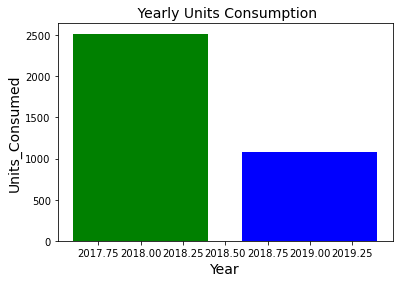

In [253]:
colors = ['green','blue','purple','brown','red']
plt.bar(yearly_units['Year'], yearly_units['Units_Consumed'], color = colors)
plt.title(' Yearly Units Consumption', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Units_Consumed', fontsize=14)
plt.show()


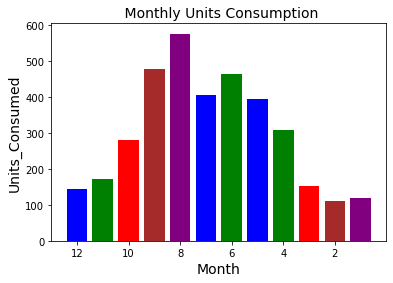

In [251]:
colors = ['green','blue','purple','brown','red']
plt.bar(monthly_units['Month'], monthly_units['Units_Consumed'], color = colors)
plt.title(' Monthly Units Consumption', fontsize=14)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Units_Consumed', fontsize=14)
plt.gca().invert_xaxis()
plt.show()


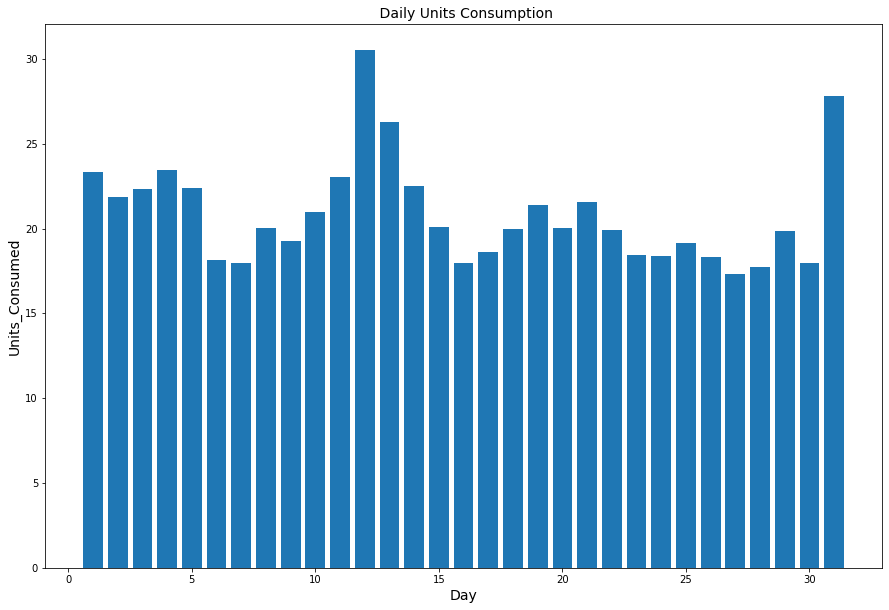

In [270]:
fig, axes = plt.subplots(1,1)
fig.set_size_inches(15,10)
plt.bar(daily_units['Day'], daily_units['Units_Consumed'])
plt.title(' Daily Units Consumption', fontsize=14)
plt.xlabel('Day', fontsize=14)
plt.ylabel('Units_Consumed', fontsize=14)
plt.show()

##Daily Units Consumption are plotted against first month in dataset


##### **Power Crises**

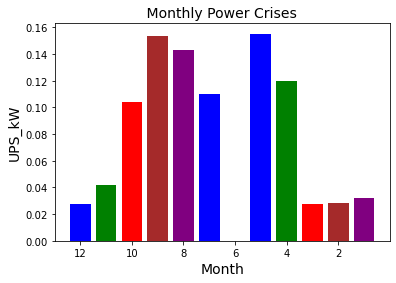

In [276]:
colors = ['green','blue','purple','brown','red']
plt.bar(monthly_stats['Month'], monthly_stats['UPS_kW'], color = colors)
plt.title(' Monthly Power Crises ', fontsize=14)
plt.xlabel('Month', fontsize=14)
plt.ylabel('UPS_kW', fontsize=14)
plt.gca().invert_xaxis()
plt.show()
